# Spin-Orbit Coupling
## Action by Leonard A. Gómez-García

In this chapter, we start by further examining the effects of a tidal torque on a satellite’s rotation.

For details on the theory please refer directly to the book:

> Murray, C. D., & Dermott, S. F. (1999). Solar system dynamics. Cambridge university press.

## 5.1. Introduction

In the previous chapter, we considered the effect of tides raised on a satellite by a planet where we assumed that the satellite was in a synchronous spin state

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

## 5.2 Tidal Despinning 

For small values of the satellite’s eccentricity e, the angle $\phi$ (Shown in book's Figure 5.1b) is given by:
\begin{equation}
\phi \approx 2e \sin{nt}.
\end{equation}

The tidal torque acting to change the spin of the satellite is:

\begin{equation}
N_{s} = -D \left( \frac{a}{r} \right)^{6}sign{(\dot{\eta}-\dot{\phi})}
\end{equation}

where

\begin{equation}
D = \frac{3}{2} \frac{k_{2}}{Q_{s}} \frac{n_{4}}{G} R_{s}^{5}
\end{equation}

and is a positive constant, and $Q_{s}$, $k_{2}$, and $R_{s}$ are the tidal dissipation function,
Love number, and radius of the satellite, respectively. A positive torque will act
to increase the spin of the satellite, $\dot{\eta}$.

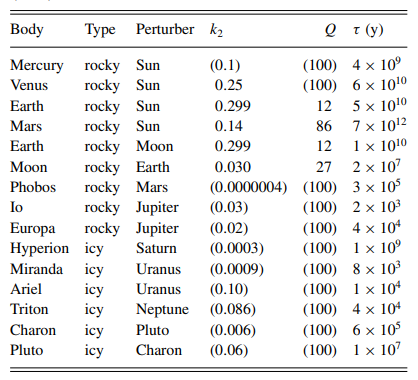

(2.186456425575314, 0.2301533079552962)

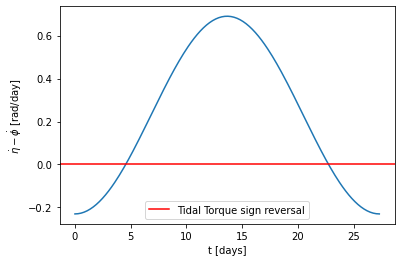

In [4]:
#Calculations of the mean Tidal torque for the Earth-Moon system.

#Tests
t = np.linspace(0, 27.3, 200)
n = 2*np.pi/27.3 # Moon's angular velocity
eta_dot = n # Moon's rotation over itself
e = 1
phi_dot = 2*e*n*np.cos(n*t)

fig, ax = plt.subplots()
ax.plot(t, eta_dot-phi_dot)
ax.axhline(0.0, color='red', 
           label='Tidal Torque sign reversal')
ax.set(xlabel='t [days]', 
       ylabel='$\dot{\eta}-\dot{\phi}$ [rad/day]')
ax.legend()
## Explain the meaning of the sign in the tidal torque
##Check derivation of the equation 5.14

## 5.3 The Permanent Quadrupole Moment

SHOW:
Thus, in the absence of a permanent quadrupole moment, the Moon, for example,
would rotate about 3% faster than the observed synchronous rate, and over a
period of about 2.6 y, we would see both sides of the satellite

## 5.4 Spin-Orbit Resonance

## 5.5 Capture into Resonance

## 5.6 Forced Librations

## 5.7 Surface of Section